# **Multicollinearity**
✅ **Definition**:

Multicollinearity occurs when two or more input features (independent variables) in a regression model are highly correlated with each other.

🧠 **Why is it a problem?**

Makes it hard to determine which variable is actually influencing the output.

The coefficients become unstable (change a lot with small changes in data).

Can lead to misleading interpretations of feature importance.

📌 **Automotive Example:**
If you're predicting fuel efficiency using:

    engine_rpm

    gear_position

    vehicle_speed

Then engine_rpm and vehicle_speed might be highly correlated — creating multicollinearity.

✅ **How to detect it:**

Correlation matrix (check for high values)

Variance Inflation Factor (VIF): VIF > 5 or 10 = warning sign

## **Real-World Consequences**

---

## 🚗 **Imagine This Situation**:

You’re building a model to predict **fuel efficiency (mpg)** using car features like:

* `engine_size`
* `horsepower`

Now think:

* When engine size increases, horsepower also increases.
* These two features are **telling almost the same story**.

---

## 🧠 Problem: Model Gets “Double-Counted” Info

In **Linear Regression**, the model tries to assign a **weight (coefficient)** to each feature.

If both `engine_size` and `horsepower` carry the same info:

* The model gets confused:
  "Who should get the credit for reducing `mpg`? One? Both?"
* It might assign **weird, unstable weights** to both (sometimes +ve, sometimes -ve)
* Small changes in data cause **big swings in coefficients**

---

### 🔧 Example:

```
mpg = 50 - 0.5 * engine_size - 0.3 * horsepower
```

Now imagine both features increase together. The model might instead learn:

```
mpg = 60 - 0.2 * engine_size - 0.6 * horsepower
```

Same prediction, but **different weights** — and hard to **trust or explain**.

---

## 🚨 Real-World Consequences (Especially for You)

In your **automotive domain** where safety, reliability, and diagnostics matter:

* You **must trust the model's reasoning**
* If a model says “weight causes low mpg,” but the real issue was horsepower → wrong diagnosis
* **Interpretability and stability** are critical

---

## ✅ Summary

| Issue                      | Why It's Bad                                  |
| -------------------------- | --------------------------------------------- |
| Confusing similar features | Model doesn’t know who’s more important       |
| Unstable coefficients      | Tiny data change → big weight change          |
| Hard to explain            | In safety/diagnostics, you need clear answers |
| Risky in deployment        | May behave inconsistently on real-world data  |

---

### **How To Fix Multicollinearity**

**Option 1: Remove One of the Correlated Features**

Best for: interpretability and simple models (like Linear Regression)

✔️ What to do:
Use .corr() or VIF to identify pairs with |correlation| > 0.8 or VIF > 5

Drop one of the two features (keep the one more relevant or simpler)

**Option 2: Use Regularized Regression**

Best for: complex models, many features, and when you want to keep all features

✳️ Use:
**Ridge Regression**: penalizes large coefficients (shrinks them)

**Lasso Regression**: sets some coefficients to zero (acts like feature selector)

**ElasticNet**: combo of both

These models can handle multicollinearity automatically, without dropping features.



## 🚗 In Your Automotive Domain:

| If You Need...                        | Then...                    |
| ------------------------------------- | -------------------------- |
| Explainable & simple models           | ❌ Drop one of the features |
| Robust performance with many inputs   | ✅ Use Ridge/Lasso          |
| Embedded systems (low memory)         | ✅ Drop & simplify          |
| Complex ML pipelines (e.g., ensemble) | ✅ Use regularized model    |

---




# **Homoscedasticity**
✅ **Definition:**

Homoscedasticity means the variance of the residuals (errors) is constant across all levels of the input variables.

❌ If this assumption is violated → **Heteroscedasticity**

**🧠 Why is it important?**
Uneven spread of errors means model performance isn’t consistent.

Predictions might be biased or have unreliable confidence intervals.

**📊 Visual Example:**

If you plot residuals vs. predicted values:


✅ Homoscedastic: residuals are evenly scattered (constant spread)

❌ Heteroscedastic: residuals fan out or funnel in

📌 **Automotive Example:**
When modeling tire pressure based on temperature:

At lower temperatures, variance in pressure may be small.

At higher temperatures, variance may increase → heteroscedasticity

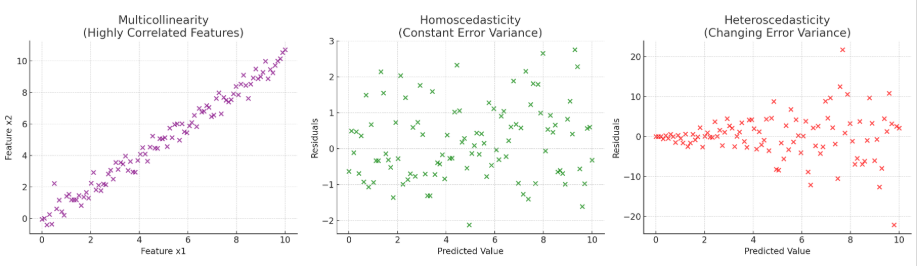

## **Example :**

🚗 Imagine you're predicting braking distance of a car based on speed:
You build a regression model.

For each speed, the model makes a prediction.

But it’s not perfect — there's a small error between the actual and the predicted value.

📌 That error is called a residual:
Residual
=
Actual Braking Distance
−
Predicted Braking Distance
Residual=Actual Braking Distance−Predicted Braking Distance


**✅ Homoscedasticity (Good):**

No matter if the car is going slow or fast, the size of error is about the same.

This is what linear regression assumes.

📊 So if you plot all errors vs. predictions, they look evenly spread.


**❌ Heteroscedasticity (Bad)**:

For slow speeds, the model is accurate (small error).

But for high speeds, the error becomes large and random.

The spread of errors increases — like a funnel or fan.

# **Correalaion**

Correlation, specifically Pearson correlation, measures the linear relationship between two variables. It gives a value between -1 and +1:

+1 means perfect positive linear correlation
(Ex. As temperature increases, ice cream sales also increase)

-1 means perfect negative linear correlation
(Ex. Number of Cigarettes Smoked vs. Lung Health Score)
0 means no linear correlation
(Ex. No relationship; changing shoe size doesn't affect intelligence.)

### **How its Calculated**

Ex.**Study Hours vs. Exam Scores**

Let’s say 3 students studied for different hours and got different exam scores:

| Student | Study Hours (X) | Exam Score (Y) |
| ------- | --------------- | -------------- |
| A       | 2               | 60             |
| B       | 4               | 70             |
| C       | 6               | 90             |

---

#### Step 1: Find Mean of X and Y

$$
\bar{X} = \frac{2 + 4 + 6}{3} = 4 \quad,\quad \bar{Y} = \frac{60 + 70 + 90}{3} = 73.33
$$

---

### Step 2: Calculate Deviation from Mean

| X | Y  | X−𝑋̄ | Y−𝑌̄  | (X−𝑋̄)(Y−𝑌̄) | (X−𝑋̄)² | (Y−𝑌̄)² |
| - | -- | ----- | ------ | -------------- | -------- | -------- |
| 2 | 60 | -2    | -13.33 | 26.66          | 4        | 177.69   |
| 4 | 70 | 0     | -3.33  | 0.00           | 0        | 11.09    |
| 6 | 90 | +2    | 16.67  | 33.34          | 4        | 278.89   |

---

### Step 3: Apply Pearson Correlation Formula

$$
r = \frac{\sum (X−\bar{X})(Y−\bar{Y})}{\sqrt{\sum (X−\bar{X})^2 \cdot \sum (Y−\bar{Y})^2}}
$$

$$
\text{Numerator} = 26.66 + 0 + 33.34 = 60.0
$$

$$
\text{Denominator} = \sqrt{(4 + 0 + 4)(177.69 + 11.09 + 278.89)} = \sqrt{8 \cdot 467.67} ≈ \sqrt{3741.36} ≈ 61.17
$$

$$
r = \frac{60.0}{61.17} ≈ 0.981
$$

---

### ✅ Final Answer:

**Correlation ≈ 0.981** → Very strong **positive linear relationship**

> More study hours → Higher exam scores

---

Want a similar one where the correlation is negative?


# **Variance Inflation Factor (VIF)**

VIF tells us how much a feature is inflated by its correlation with other features.
If VIF > 5, consider it a warning; VIF > 10 is serious multicollinearity.

If a feature has high VIF, it’s because it can be well predicted from other features.

That means it's not unique — it's giving the model info already available through others features.

For Example :

| Feature        | Correlation with `mpg` (approx)(Miles per Gallon) | VIF  | Verdict                                   |
| -------------- | ------------------------------- | ---- | ----------------------------------------- |
| `displacement` | **-0.80**                       | 19.6 | ❌ Drop (too redundant)                    |
| `horsepower`   | -0.78                           | 8.2  | ✅ Keep (closer to actual engine power)    |
| `weight`       | **-0.83**                       | 10.1 | ✅ Keep (directly affects fuel efficiency) |


So We drop displacement, not because it's “bad,” but because its info is already captured by other, more meaningful and less redundant features like horsepower and weight.



---

## ✅ Step-by-Step Guide: **Using Correlation + VIF for Feature Selection**

---

### 🔹 **Step 1: Compute Correlation Matrix**

```python
df.corr(numeric_only=True)
```

* Look at correlation **between each input and the target (e.g., `mpg`)**
* Rule of thumb:

  * **|corr| > 0.7** → Strong
  * **0.5–0.7** → Moderate
  * **< 0.3** → Weak → consider dropping

✅ **Goal:** Keep features **strongly correlated** with target (either +ve or -ve).

---

### 🔹 **Step 2: Check VIF for Selected Features**

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add intercept and compute VIF
X['intercept'] = 1
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
```

* **VIF > 10** → serious multicollinearity (bad)
* **VIF > 5** → moderate concern
* **VIF < 5** → generally safe

✅ **Goal:** Remove one of the **highly redundant features** to avoid overfitting and unstable models.

---

### 🔹 **Step 3: Decide What to Drop**

When two features are highly correlated (with each other):

* **Drop the one:**

  * With **higher VIF**
  * With **lower correlation to target**
  * Or that makes **less sense** in real-world automotive context

---

### 🔧 Example (like your case):

| Feature        | Corr with mpg | VIF  | Action                 |
| -------------- | ------------- | ---- | ---------------------- |
| `displacement` | -0.80         | 19.6 | ❌ Drop (too redundant) |
| `horsepower`   | -0.78         | 8.2  | ✅ Keep                 |
| `weight`       | -0.83         | 10.1 | ✅ Keep                 |
| `acceleration` | +0.42         | 2.5  | ✅ Keep                 |

---

## ✅ Final Rule of Thumb:

> ✔️ Use **correlation** to judge **importance to target**

> ❌ Use **VIF** to detect **redundancy between inputs**

---

